# Question 3 - Would the travel delays be effected by the month of the year

In this analysis, we are checking if there is any corelation between flight delays and the time of the year. This analysis can help airlines and airports optimize scheduling and allocate resources more effectively.

In [1]:
#Importing dependancies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#Importing the CSV file
file_one = Path("Data.csv")
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_one_df

,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,airline_name,Description,Code.y
0,2018,1,1/9/18 00:00,AS,498,14057,12892,-13.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
1,2018,1,1/9/18 00:00,AS,502,14057,12892,-12.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
2,2018,1,1/9/18 00:00,AS,532,14057,14679,-5.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
3,2018,1,1/9/18 00:00,AS,540,14057,12892,-11.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
4,2018,1,1/9/18 00:00,AS,544,14057,12892,-6.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359971,2022,7,7/28/22 00:00,F9,1941,12191,12889,173.0,173.0,1.0,...,NaN,0,80.0,0.0,85.0,0.0,0.0,Frontier,"Houston, TX: William P Hobby",HOU
2359972,2022,7,7/29/22 00:00,F9,1338,12191,13204,120.0,120.0,1.0,...,NaN,0,69.0,0.0,28.0,0.0,22.0,Frontier,"Houston, TX: William P Hobby",HOU
2359973,2022,7,7/29/22 00:00,F9,1939,12191,12889,41.0,41.0,1.0,...,NaN,0,12.0,0.0,21.0,0.0,0.0,Frontier,"Houston, TX: William P Hobby",HOU
2359974,2022,7,7/30/22 00:00,F9,1338,12191,13204,36.0,36.0,1.0,...,NaN,0,18.0,0.0,8.0,0.0,18.0,Frontier,"Houston, TX: William P Hobby",HOU


# Creating the tables for each airline - Alaska, Frontier & Spirit

### Creating the clean table for Alaska Airlines

In [3]:
#Creating a rough table for analysis
alaska_rough = file_one_df.loc[file_one_df["airline_name"]=="Alaska",:]
alaska = alaska_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_alaska = alaska.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_alaska = alaska.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
alaska_df = pd.merge(dep_delay_alaska,arr_delay_alaska, on=["YEAR", "MONTH"], how="left")
alaska_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]
alaska_df

,Year,Month,Departure Delay,Arrival Delay
0,2018,1,-2.0,-7.0
1,2018,2,-1.0,-4.0
2,2018,3,-1.0,-4.0
3,2018,4,2.0,-0.0
4,2018,5,3.0,2.0
5,2018,6,3.0,-0.0
6,2018,7,3.0,0.0
7,2018,8,8.0,7.0
8,2018,9,0.0,-3.0
9,2018,10,3.0,1.0


In [4]:
# max_dep = alaska_df["Departure Delay"].max()
# min_dep = alaska_df["Departure Delay"].min()
# max_arr = alaska_df["Arrival Delay"].max()
# min_arr = alaska_df["Arrival Delay"].min()
# print(max_dep, min_dep, max_arr, min_arr)

### Creating the clean table for Frontier Airlines

In [5]:
#Creating a rough table for analysis
frontier_rough = file_one_df.loc[file_one_df["airline_name"]=="Frontier",:]
frontier = frontier_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_frontier = frontier.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_frontier = frontier.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
frontier_df = pd.merge(dep_delay_frontier,arr_delay_frontier, on=["YEAR", "MONTH"], how="left")
frontier_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

In [87]:
# max_dep = frontier_df["Departure Delay"].max()
# min_dep = frontier_df["Departure Delay"].min()
# max_arr = frontier_df["Arrival Delay"].max()
# min_arr = frontier_df["Arrival Delay"].min()
# print(max_dep, min_dep, max_arr, min_arr)

30.0 -8.0 26.0 -18.0


### Creating the clean table for Spirit Airlines

In [6]:
#Creating a rough table for analysis
spirit_rough = file_one_df.loc[file_one_df["airline_name"]=="Spirit",:]
spirit = spirit_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_spirit = spirit.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_spirit = spirit.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
spirit_df = pd.merge(dep_delay_spirit,arr_delay_spirit, on=["YEAR", "MONTH"], how="left")
spirit_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

In [89]:
# max_dep = spirit_df["Departure Delay"].max()
# min_dep = spirit_df["Departure Delay"].min()
# max_arr = spirit_df["Arrival Delay"].max()
# min_arr = spirit_df["Arrival Delay"].min()
# print(max_dep, min_dep, max_arr, min_arr)

25.0 -3.0 21.0 -13.0


# Plotting the graphs for Months vs Number of Delays for all the Airlines

## I. Alaska Airlines

### - for Departure Delays

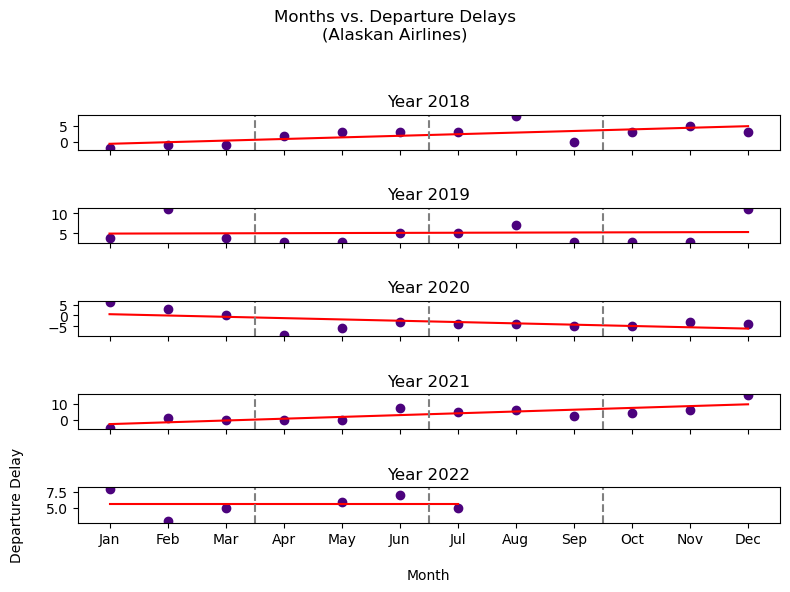

In [14]:
years = alaska_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Alaskan_departure.png")

### - Arrival Delays

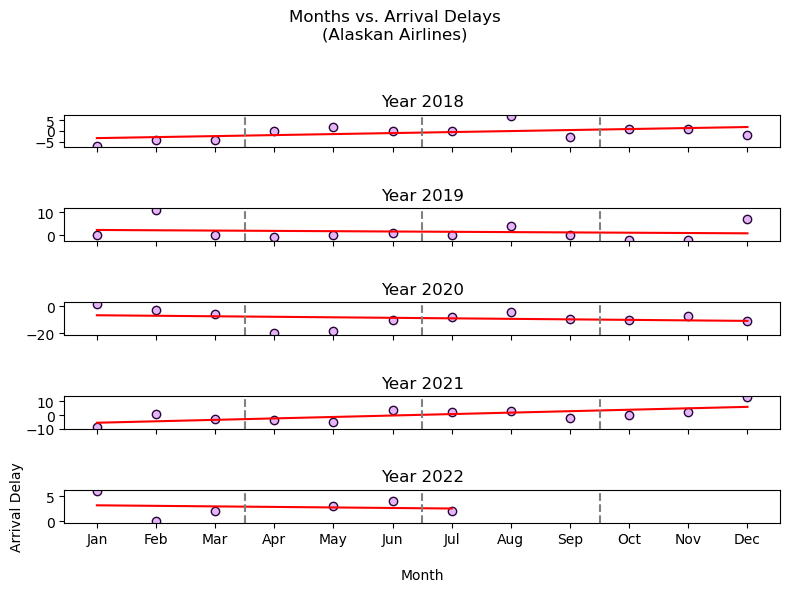

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Alaskan_arrival.png")

## II. Frontier Airlines

### - Departure Delays

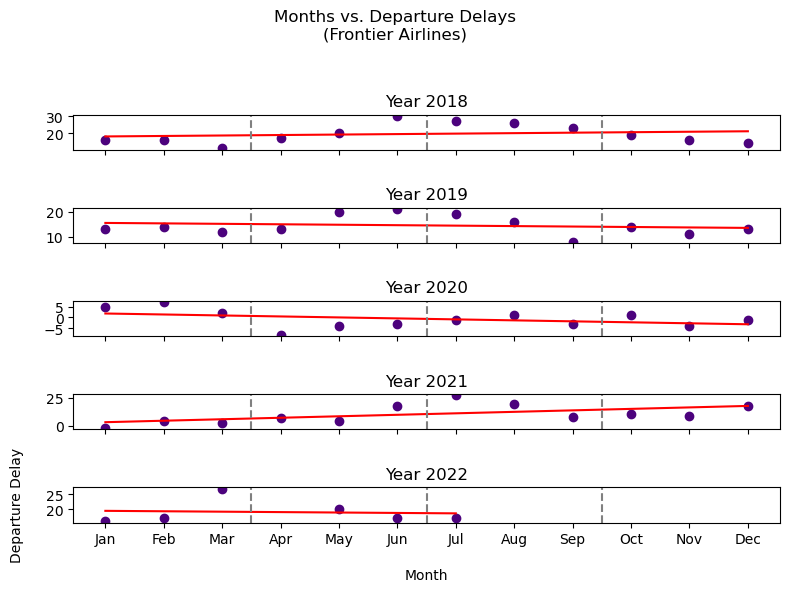

In [17]:
years1 = frontier_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Frontier_departure.png")

### - Arrival Delays

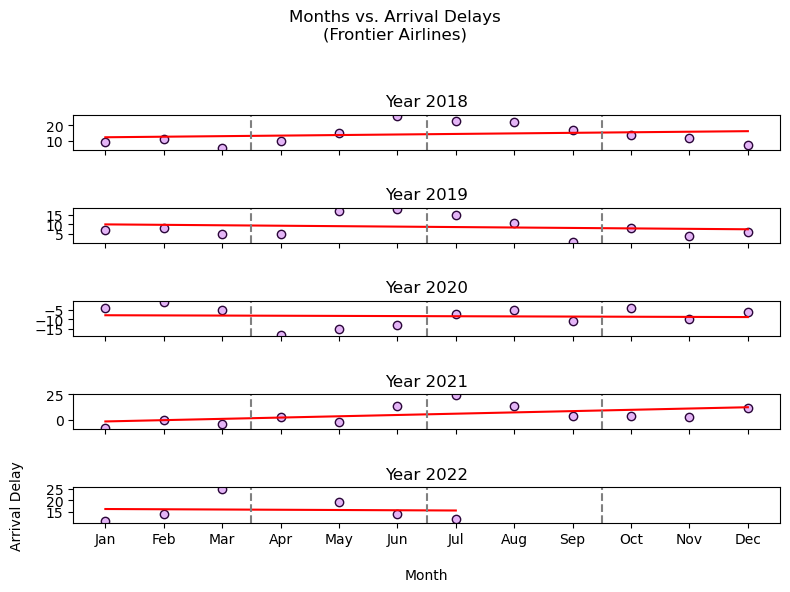

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Frontier_arrival.png")

## III. Spirit Airlines

### - Departure Delays

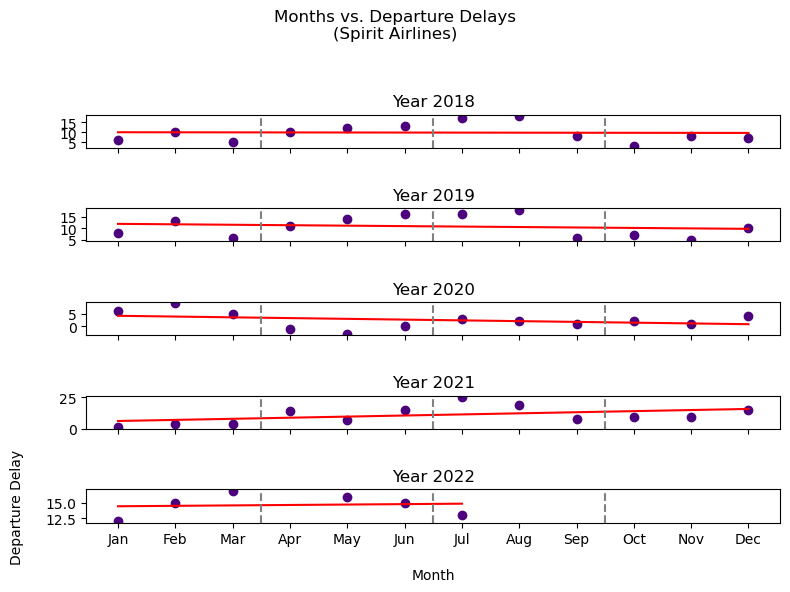

In [19]:
years2 = spirit_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Spirit Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Spirit_departure.png")

### - Arrival Delays

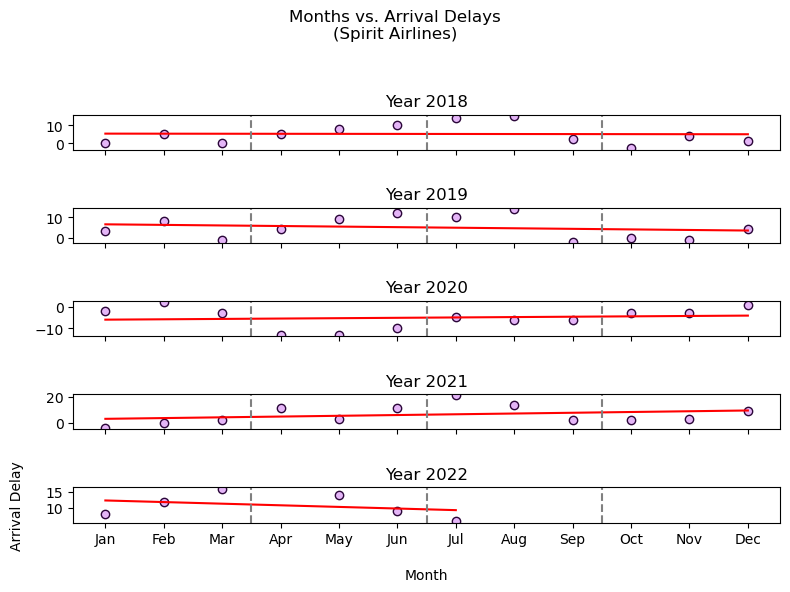

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years2):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Spirit Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Spirit_arrival.png")

# Summary

After analysing the data from three different airlines for their individual arrival and departure delays, we can draw the following conclusions:-
> - The delays are inconsistent in Q1 and Q4.
> - The number of delays increases in Q2 and gradually decreases in Q3
> - The graphs for most of the graphs show a positive relationship between the month and the delays. This means that the number of delays increases are we near the end of the year

# Limitations

The following are the limitations for this analysis:-
> - 2019 & 2020 was marked as the years for COVID-19 flight restrictions. As a result, travel between certain countries were restricted. As such, this created an inconsistency with the data.
> - The data provided for 2022 is only available till July 2022.